In [1]:
# The code was removed by Watson Studio for sharing.

### Membaca data

In [2]:
# The code was removed by Watson Studio for sharing.

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


###  Analisis terhadap data

In [3]:
# mengecek apakah ada data yang missing value
# mengecek tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Avg. Area Income                5000 non-null float64
Avg. Area House Age             5000 non-null float64
Avg. Area Number of Rooms       5000 non-null float64
Avg. Area Number of Bedrooms    5000 non-null float64
Area Population                 5000 non-null float64
Price                           5000 non-null float64
Address                         5000 non-null object
dtypes: float64(6), object(1)
memory usage: 273.5+ KB


In [4]:
# mengecek statistik data
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sns.set_style('whitegrid')

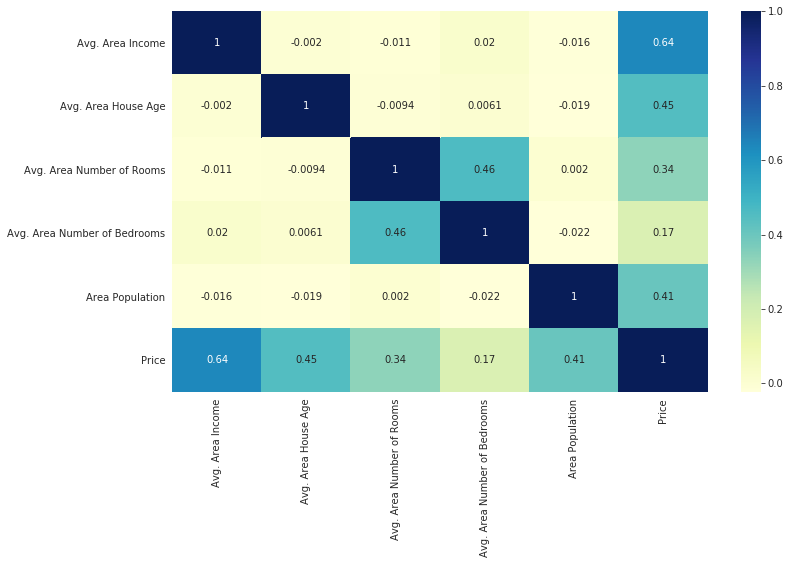

In [7]:
# mengecek korelasi antar data
plt.figure(figsize=(12,7))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="YlGnBu")

In [8]:
# Dari hasil visualisasi korelasi diatas dapat diketahui bahwa 
# variabel "Avg. Area Income" memiliki korelasi yang kuat dengan variabel "Price"
# yaitu sebesar 0.64

In [9]:
# Sekarang saya mencoba memvisualisasikan korelasi antara
# Avg. Area Income dan Price

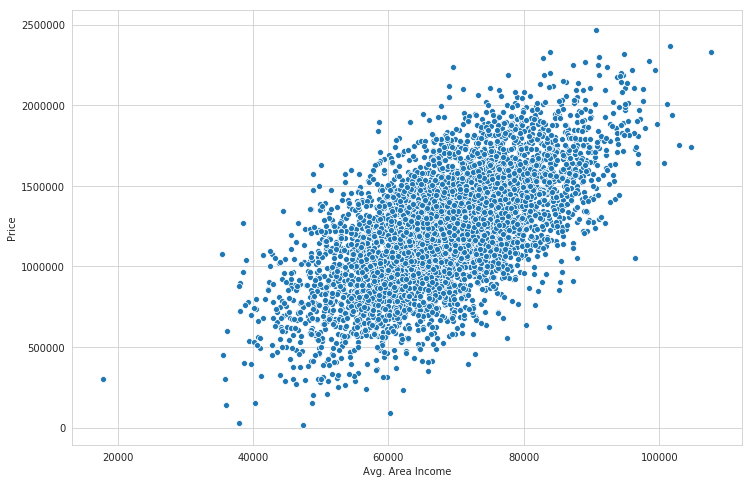

In [10]:
plt.figure(figsize=(12,8))
sns.scatterplot(df['Avg. Area Income'], df['Price'])

In [11]:
# Terlihat dari hasil visualisasi bahwa kedua variabel memang memiliki
# korelasi yang cukup kuat

In [12]:
# Sekarang saya akan mencoba memvisualisasikan distribusi 
# dari variabel tujuan / dependent yaitu "Price" 

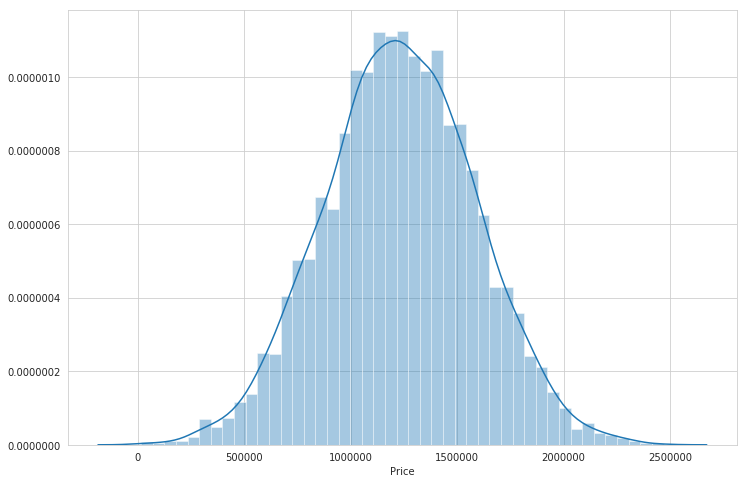

In [13]:
plt.figure(figsize=(12,8))
sns.distplot(df['Price'])

In [14]:
# Dari hasil visuaslisasi terlihat bahwa distribusi
# dari variabel Price cukup normal

### Modeling data

In [15]:
# Ketika tahap analisis data, diketahui bahwa variable address memiliki 
# tipe data object, sehingga variable address akan kita hapus dan
# tidak digunakan dalam modeling data 

# data yang saya gunakan untuk metode linear regression dalam memprediksi
# harga rumah yaitu data yang memiliki tipe data float64

In [16]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [17]:
# menghapus variabel address dari dataset
df.drop('Address', axis='columns', inplace=True)

In [18]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [19]:
# pada tabel dataset terlihat bahwa variabel Address sudah terhapus

In [20]:
# Sekarang saya akan menentukan X dan y

In [21]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 
        'Avg. Area Number of Bedrooms', 'Area Population']]

In [22]:
X.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [23]:
y = df['Price']

In [24]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [25]:
# saya akan membagi data menjadi dua bagian, yaitu train (80%) dan test (20%)

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Modeling Linear Regression

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
model = LinearRegression()

In [30]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

### Menguji Model

In [31]:
# Pengujian dilakukan dengan menggunakan model yang sudah ditraining
# dan data test

In [32]:
predictions = model.predict(X_test)

### Evaluasi Model

In [33]:
# Saya mencoba melakukan visualisasi antara 
# hasil prediksi (predictions) dan nilai sebenarnya (y_test)

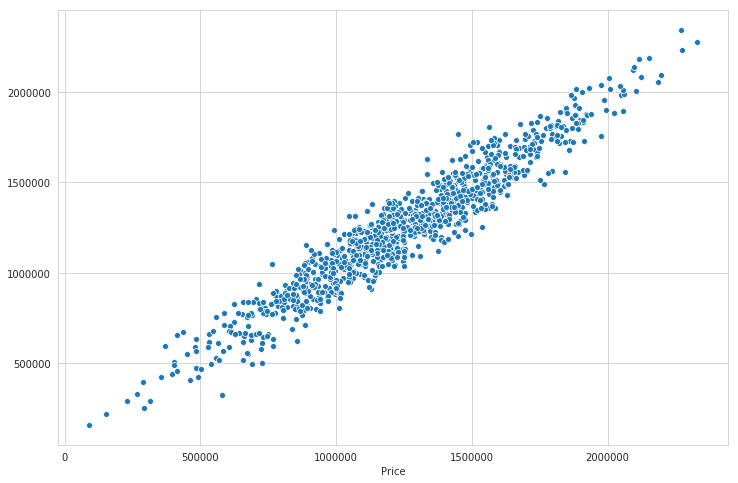

In [34]:
plt.figure(figsize=(12,8))
sns.scatterplot(y_test, predictions)

In [35]:
# Pada visualisasi diatas terlihat antara hasil prediksi dan nilai sebenarnya
# hampir membentuk suatu garis lurus,
# hal ini menunjukan hasil prediksi dari model yang baik atau 
# mendekati nilai sesungguhnya.

In [36]:
# Sekarang saya mencoba mengevaluasi menggunakan matrics mse dan rmse

In [37]:
from sklearn.metrics import mean_squared_error

In [38]:
mean_squared_error(y_test, predictions)

10100187858.863457

In [39]:
import numpy as np

In [40]:
np.sqrt(mean_squared_error(y_test, predictions))

100499.69083964117

In [41]:
# Menyimpan dataset yang telah dianalisis dan diolah

In [42]:
# Saya komentar supaya tidak terunning / dipergunakan kalau perlu saja
# project.save_data(file_name="USA_Housing_clean.csv", data=df.to_csv(index=False))